## Decision Trees

In [ ]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
# Read in data from preprocessing
df = pd.read_csv('mental_health_tech.csv', index_col=0)
test = pd.read_csv('mental-heath-in-tech-2016_20161114.csv')
len(test.columns)

63

In [ ]:
df = df[['Age', 'Gender', 'MH Family History', 'Sought Treatment', 'Prev Awareness of Company MH Care', "Remote", "Country", "State", "Tech/No Tech", "Total Employees", "MH Benefits", "MH Resources", "Medical Leave"]]
df.head(5)

,Age,Gender,MH Family History,Sought Treatment,Prev Awareness of Company MH Care,Remote,Country,State,Tech/No Tech,Total Employees,MH Benefits,MH Resources,Medical Leave
0,4,1.0,No,0,N/A (not currently aware),Sometimes,2,0,1.0,3,Not eligible for coverage / N/A,No,Very easy
1,3,1.0,Yes,1,I was aware of some,Never,1,2,1.0,2,No,Yes,Somewhat easy
2,4,1.0,No,1,N/A (not currently aware),Always,2,0,1.0,2,No,No,Neither easy nor difficult
4,4,2.0,Yes,1,N/A (not currently aware),Sometimes,1,2,0.0,2,Yes,No,Neither easy nor difficult
5,4,1.0,No,1,"Yes, I was aware of all of them",Sometimes,2,0,1.0,6,Yes,Yes,Somewhat easy


In [ ]:
# Construct data frame that shows number of unique values for each column
d = {'Column Name': df.columns, 'Unique Values': df.nunique()}
unique_vals = pd.DataFrame(data=d).reset_index()[['Column Name', 'Unique Values']].sort_values(by='Unique Values', ascending=False)

# Selecting only column names that have a valid number of unique values for dummy variable transformation (filter out binary and large numbers of unique values)
valid_dummy = unique_vals[(unique_vals['Unique Values']!=2) & (unique_vals['Unique Values']!=53) & (unique_vals['Unique Values']!=48)]
dummy_list = valid_dummy['Column Name'].values
dummy_list

array(['Country', 'Total Employees', 'Medical Leave', 'Age', 'State',
       'Prev Awareness of Company MH Care', 'MH Benefits', 'Gender',
       'MH Family History', 'Remote', 'MH Resources'], dtype=object)

In [ ]:
# Make dummy variable columns for the valid column names we found above
df = pd.get_dummies(df, columns=dummy_list)
df.head()

,Sought Treatment,Tech/No Tech,Country_1,Country_2,Country_3,Country_4,Country_5,Country_6,Country_7,Total Employees_1,...,Gender_3.0,MH Family History_I don't know,MH Family History_No,MH Family History_Yes,Remote_Always,Remote_Never,Remote_Sometimes,MH Resources_I don't know,MH Resources_No,MH Resources_Yes
0,0,1.0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,1,0
1,1,1.0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,1
2,1,1.0,0,1,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,1,0
4,1,0.0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,1,0
5,1,1.0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,1


In [ ]:
# Column we are predicting
y_train = df['Sought Treatment']

In [ ]:
x_train = df.drop(['Sought Treatment'], axis=1)

#use validation
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(x_train, y_train, test_size=0.30)

0.72875
0.7026239067055393
[[223 123]
 [ 94 360]]
[[ 83  60]
 [ 42 158]]


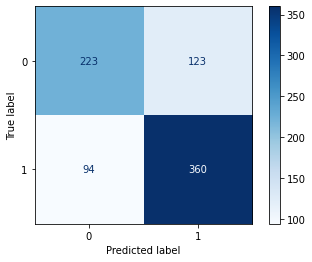

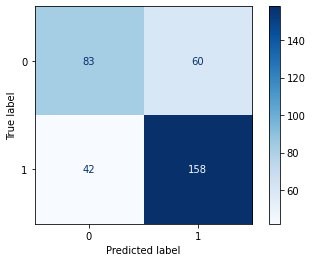

In [ ]:
clf = DecisionTreeClassifier(max_depth=3)
clf.fit(X_train, Y_train)
print(accuracy_score(clf.predict(X_train), Y_train))
print(accuracy_score(clf.predict(X_val), Y_val))

CM_train = confusion_matrix(Y_train, clf.predict(X_train))
CM_val = confusion_matrix(Y_val, clf.predict(X_val))
print(CM_train)
print(CM_val)

plot_confusion_matrix(clf, X_train, Y_train, cmap=plt.cm.Blues)
plt.show()
plot_confusion_matrix(clf, X_val, Y_val, cmap=plt.cm.Blues)
plt.show()

In [ ]:
# Computing metrics using confusion matrix (TRAINING)

TP_train = CM_train[0][0]
TN_train = CM_train[1][1]
FP_train = CM_train[0][1]
FN_train = CM_train[1][0]

P = TP_train + FP_train
N = TN_train + FN_train

accuracy_train = (TP_train + TN_train) / (P + N)
error_rate = (FP_train + FN_train) / (P + N)
recall_train = TP_train / (TP_train + FN_train)
specificity_train = TN_train / N
precision_train = TP_train / (TP_train + FP_train)
f1_score_train = 2 * ((precision_train * recall_train) / (precision_train + recall_train))
FNR_train = FN_train / (FN_train + TP_train)

measures_train = ["Accuracy", "Error / Misclassification Rate", "Recall / Sensitivity (True Positive Rate)", "Specificity (True Negative Rate)", "Precision", "F/F1/F-score", "False Negative Rate"]
values_train = [accuracy_train, error_rate, recall_train, specificity_train, precision_train, f1_score_train, FNR_train]

d_train = {'Measure Names': measures_train, 'Values': values_train}
results_train = pd.DataFrame(data=d_train)
results_train

,Measure Names,Values
0,Accuracy,0.728750
1,Error / Misclassification Rate,0.271250
2,Recall / Sensitivity (True Positive Rate),0.703470
3,Specificity (True Negative Rate),0.792952
4,Precision,0.644509
5,F/F1/F-score,0.672700
6,False Negative Rate,0.296530


In [ ]:
# Computing metrics using confusion matrix (VALIDATION)

TP_val = CM_val[0][0]
TN_val = CM_val[1][1]
FP_val = CM_val[0][1]
FN_val = CM_val[1][0]

precision_val = TP_val / (TP_val + FP_val)
recall_val = TP_val / (TP_val + FN_val)
f1_score_val = 2 * ((precision_val * recall_val) / (precision_val + recall_val))
FPR_val = FP_val / (FP_val + TN_val)

measures_val = ['Precision', 'Recall', 'F1 Score', 'FPR']
values_val = [precision_val, recall_val, f1_score_val, FPR_val]

d_val = {'Measure Names': measures_val, 'Values': values_val}
results_val = pd.DataFrame(data=d_val)
results_val

,Measure Names,Values
0,Precision,0.580420
1,Recall,0.664000
2,F1 Score,0.619403
3,FPR,0.275229


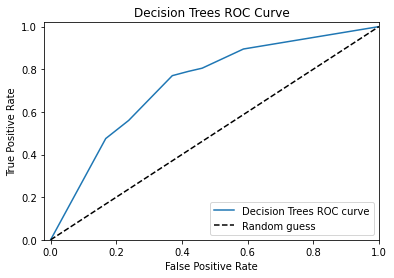

In [ ]:
y_pred_prob = clf.predict_proba(X_val)[:,1]

from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
%matplotlib inline

fpr, tpr, thresholds = roc_curve(Y_val, y_pred_prob)
# create plot
plt.plot(fpr, tpr, label='Decision Trees ROC curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
_ = plt.xlabel('False Positive Rate')
_ = plt.ylabel('True Positive Rate')
_ = plt.title('Decision Trees ROC Curve')
_ = plt.xlim([-0.02, 1])
_ = plt.ylim([0, 1.02])
_ = plt.legend(loc="lower right")

In [ ]:
from IPython.display import Image  
!pip install --upgrade pip
!pip install pydotplus
!pip install pydot
import pydotplus 
import pydot
from io import StringIO
from sklearn import tree

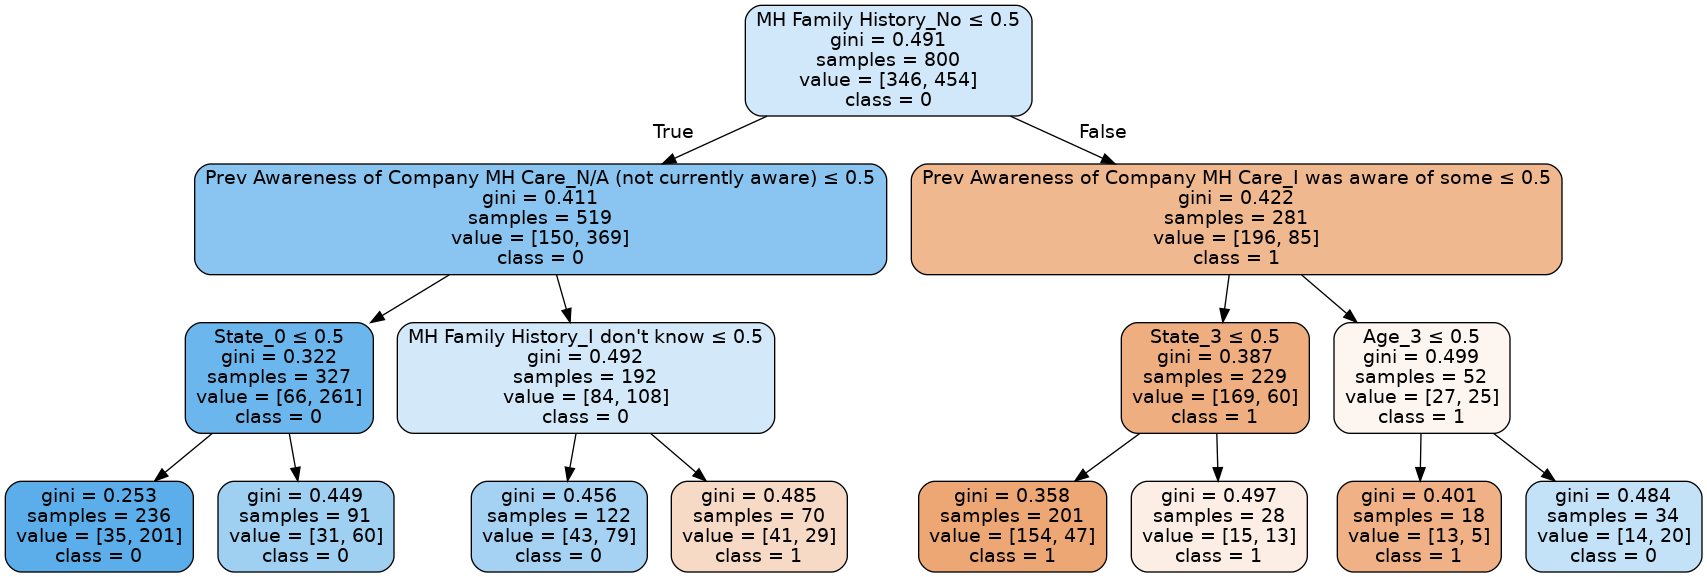

In [ ]:
dotfile = StringIO() 
tree.export_graphviz(clf, out_file=dotfile, feature_names=X_train.columns, class_names=['1', '0'], filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dotfile.getvalue())
Image(graph.create_png())

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=387b3f34-ad6b-4fed-8016-3e4e46161261' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>